In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [3]:
def heating_power(A, L, int_k):
    '''
    Given an area, length, and integrated thermal conductivity
    (see e.g. https://cds.cern.ch/record/1973682/files/arXiv:1501.07100.pdf table A3, sec. 2.2 for explanation),
    get heat load in Watts.
    '''
    
    return A / L * int_k

def int_k(k_of_T_func, T_i, T_f, N=1000):
    '''
    Take the integral of k(T) from one temperature to another.
    Plug this into heating_power() to find heat flow.
    '''
    
    Ts = np.linspace(T_i, T_f, N)
    dT = np.diff(Ts)[0]
    ks = k_of_T_func(Ts)
    int_k = np.sum(ks) * dT
    
    return int_k 

def tube_A(outer_r, inner_r):
    '''
    Cross-sec. area of a tube with outer and inner radii.
    '''
    
    outer_A = np.pi*outer_r**2
    inner_A = np.pi*inner_r**2
    
    return outer_A - inner_A

In [4]:
def G10_k(T, params):
    '''
    From NIST.
    '''
    terms = np.array([(np.log10(T))**i for i in range(len(params))])
    exponent = (terms.T * params).T
    return np.power(10, np.sum(exponent, axis=0))

# good down to 10 K
G10_params_norm = np.array([-4.1236, 13.788, -26.068, 26.272, -14.663, 4.4954, -0.6905, 0.0397])
# below is what we use. Good to 12 K.
G10_params_warp = np.array([-2.64827, 8.80228, -24.8998, 41.1625, -39.8754, 23.1778, -7.95635, 1.48806, -0.11701])

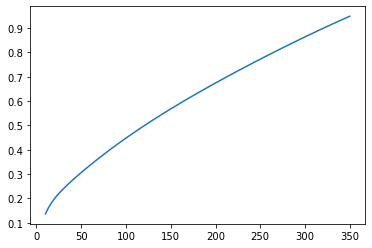

In [5]:
T = np.linspace(10, 350, 100)
plt.plot(T, G10_k(T, G10_params_warp))

c.f. https://trc.nist.gov/cryogenics/materials/G-10%20CR%20Fiberglass%20Epoxy/G10CRFiberglassEpoxy_rev.htm, plot for warp direction

In [6]:
G10_int_k = int_k(partial(G10_k, params=G10_params_warp), 10, 300, N=10000) # W / m K
A = 6*tube_A(0.05, 0.05-0.001) # m^2
L = 0.3 # m
heating_power(A, L, G10_int_k) # W

1.0076372814932397